In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from chissl.util import chissl_mongo as cm
%load_ext autoreload
%autoreload 2

In [5]:
from mnist import MNIST
mndata = MNIST('/Users/aren438/data/MNIST/', gz=True)
images, labels = mndata.load_training()

In [6]:
df = pd.DataFrame({
    'features': images,
    'ground truth': labels,
    '_id': np.arange(len(images)).astype('str')
})

df.head()

,_id,features,ground truth
0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5
1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
2,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4
3,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
4,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9


In [8]:
from chissl.util.image import img2base64
from PIL import Image

df['src'] = df.features\
    .apply(lambda x: 255 - np.reshape(x, (28, 28)).astype(np.uint8))\
    .apply(Image.fromarray, mode='L')\
    .apply(Image.Image.resize,
           size=(75, 75),
           resample=Image.BICUBIC)\
    .apply(img2base64)

df.head()

,_id,features,ground truth,src
0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,"{'type': 'image/png', 'data': 'iVBORw0KGgoAAAA..."
1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"{'type': 'image/png', 'data': 'iVBORw0KGgoAAAA..."
2,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,"{'type': 'image/png', 'data': 'iVBORw0KGgoAAAA..."
3,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"{'type': 'image/png', 'data': 'iVBORw0KGgoAAAA..."
4,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,"{'type': 'image/png', 'data': 'iVBORw0KGgoAAAA..."


In [4]:
chissl = cm.ChisslMongo(verbose=True)

chissl.create_collection('MNIST', df.to_dict(orient='records'), drop=True)

NameError: name 'df' is not defined

In [9]:
chissl.create_application('MNIST',
                          'MNIST',
                          'ImageComponent',
                          'chissl.pipelines.mnist.SimplePipeline',
                          drop=True)

{'_id': 'MNIST',
 'collection': 'MNIST',
 'component': 'ImageComponent',
 'params': {},
 'pipeline': 'chissl.pipelines.mnist.SimplePipeline',
 'props': {}}

In [32]:
obj = chissl.create_model('MNIST', 'test', drop=True)

Finding application <MNIST>...OK
Querying collection <MNIST> <None>...found 60000...OK
labels 0 {}
Transforming data...OK
Clustering data...OK
done.


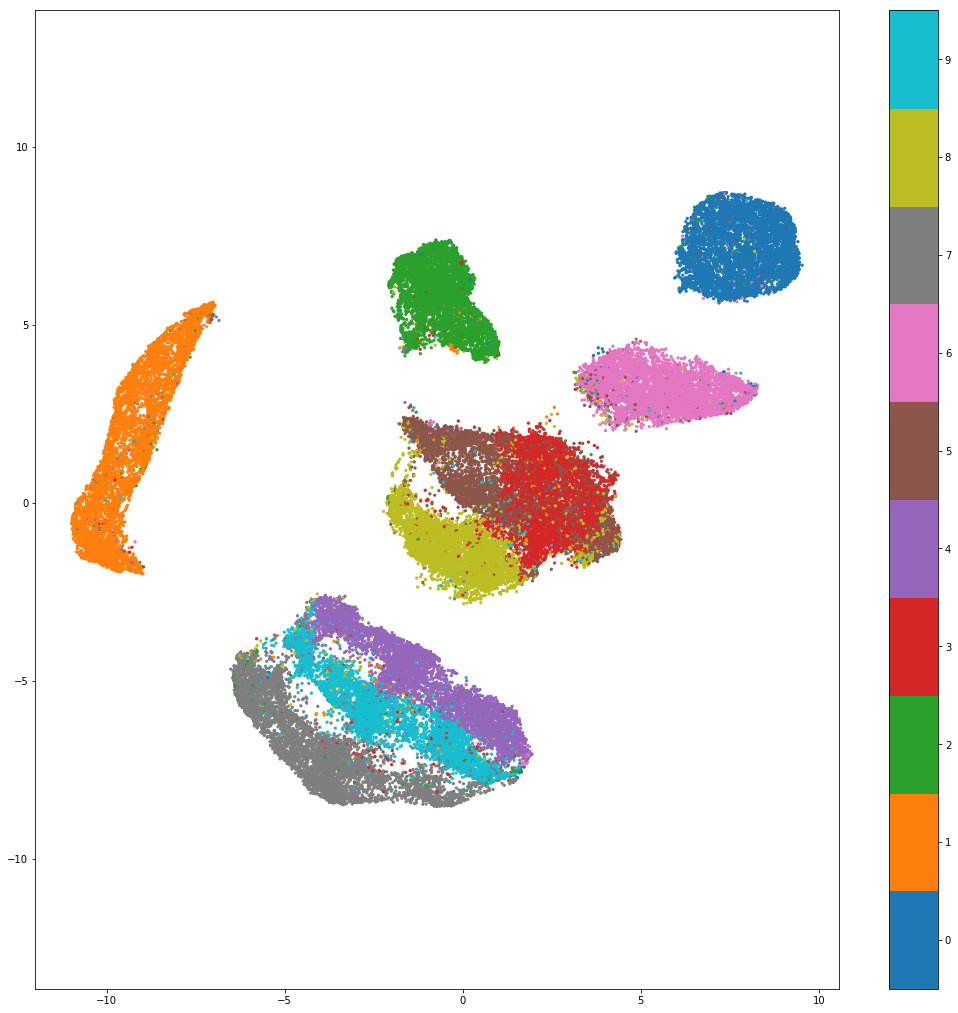

In [33]:
plt.figure(figsize=(18, 18))

plt.scatter(*np.array(obj['X']).T, s=5, c=labels, cmap='tab10', vmax=10)
plt.axis('equal')
cb = plt.colorbar()
cb.set_ticks(np.arange(10) + .5)
cb.set_ticklabels(np.arange(10).astype('str'))